### Importing necessary libraries

In [1325]:
import pandas as pd
import os
import plotly.express as px
from plotly import graph_objects as go
import seaborn as sb
import ipywidgets as widgets
import matplotlib.pyplot as plt

### extracting all files from specified folder/path

In [1326]:
files=os.listdir('./files') ##extracting list of all the files in the directory/specified path

In [1327]:
df_list=[os.path.splitext(i)[0] for i in files] ##getting names for the dataframes 

In [1328]:
df_list ###list of data loaded into dataframes

['home_page_table',
 'payment_confirmation_table',
 'payment_page_table',
 'search_page_table',
 'user_table']

In [1329]:
files ###list of files

['home_page_table.csv',
 'payment_confirmation_table.csv',
 'payment_page_table.csv',
 'search_page_table.csv',
 'user_table.csv']

In [1330]:
d={}   ###declaring a dictionary for mapping dataframe_name:data/dataframe
for i in range(len(files)):  ###iteratinig over the files list
    d[df_list[i]]=pd.read_csv("./files/"+files[i])  ###reading file for each item in the files list and storing as dataframe in the dictionary with the name of item as key

### cleaning data before analysis

In [1331]:
for i in d: ##iterating over dictionary keys
    d[i].drop_duplicates(inplace=True) ### dropping duplicates in each dataframe by accessing the value/ dataframe with key of dictionary
    print(i+":")   
    print(d[i].isna().sum()) ###checking for null/ missing values similarly
    print("lenght of"+str(i)+":"+str(len(d[i].index))) ####cross check
    print("___")

home_page_table:
user_id    0
page       0
dtype: int64
lenght ofhome_page_table:90400
___
payment_confirmation_table:
user_id    0
page       0
dtype: int64
lenght ofpayment_confirmation_table:452
___
payment_page_table:
user_id    0
page       0
dtype: int64
lenght ofpayment_page_table:6030
___
search_page_table:
user_id    0
page       0
dtype: int64
lenght ofsearch_page_table:45200
___
user_table:
user_id    0
date       0
device     0
sex        0
dtype: int64
lenght ofuser_table:90400
___


In [1332]:
df=d['user_table'] ####creating a new dataframe for ease of computations
del d['user_table'] ####deleting unwanted keys that might hinder computation

In [1333]:
df['date'] = pd.to_datetime(df['date']) ###3type conversion of date column to timestamp python object
#                            

In [1334]:
df['month'] = df['date'].dt.month ###extracting month from date column for month on month analysis or more detail and insights
df['year'] = df['date'].dt.year ###extracting year for similar reasons

In [1335]:
df_list.pop(-1) ###removing unwanted item from list for ease of computation

'user_table'

In [1336]:
list(df.columns.values) ###cross checking columns 

['user_id', 'date', 'device', 'sex', 'month', 'year']

In [1337]:
col =list(df.columns.values)+df_list ####creating a new list of required features that would be used as columns

In [1338]:
print(col) ###crosschecking

['user_id', 'date', 'device', 'sex', 'month', 'year', 'home_page_table', 'payment_confirmation_table', 'payment_page_table', 'search_page_table']


In [1339]:
for i in d:          #####iterating over dictionary keys
    temp=(d[i])['user_id'] ###looking for similar column in each value of key ie. user id to apply join 
    df=df.merge(d[i],on=['user_id'],how='left') #####extracting data and putting in one dataframe for ease and data aggregation
    

C:\Users\HARSHP~1\AppData\Local\Temp/ipykernel_9440/3929121771.py:3: FutureWarning:

Passing 'suffixes' which cause duplicate columns {'page_x'} in the result is deprecated and will raise a MergeError in a future version.



In [1340]:
df.columns=col ###renaming columns of the newly created aggregated data

In [1341]:
for i in df_list:      ###iterating over the list of dataframes as we want to look for the same columns in the new df 
    df[i] = df[i].apply(lambda x: 1 if not pd.isnull(x) else 0) ### performing one hot label encoding, i.e. assigning numbers to values

In [1342]:
df['year'].unique() ###checking unique values in the year column

array([2015], dtype=int64)

In [1343]:
df=df.drop(['year'], axis=1) ##dropping year column as all the data is from the same year, hence this feature is no longer needed for any insight as it is rendered redundant

### Active users analysis (active users=users visiting platform)

In [1344]:
##analysing overall current active users activity on the basis of devices used

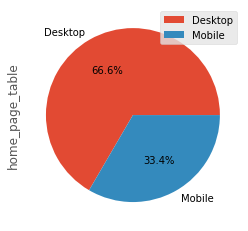

In [1345]:
active_users=pd.DataFrame(df.groupby('device')['home_page_table'].sum()).plot(kind='pie', y='home_page_table',autopct='%1.1f%%')

In [1346]:
###active users gender distribution

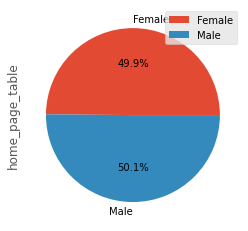

In [1347]:
active_users=pd.DataFrame(df.groupby('sex')['home_page_table'].sum()).plot(kind='pie', y='home_page_table',autopct='%1.1f%%')

In [1348]:
##month wise active user distribution

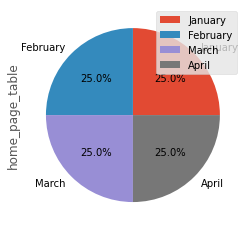

In [1349]:
active_users=pd.DataFrame(df.groupby('month')['home_page_table'].sum()).plot(kind='pie', y='home_page_table',autopct='%1.1f%%',labels=['January','February','March','April'])

In [1350]:
"""
Insights drawn on active users:
1. Users are more active through desktop than through mobile
2.Platform is visited by both men and women equally
3.Number of active users over month remains constant

"""

'\nInsights drawn on active users:\n1. Users are more active through desktop than through mobile\n2.Platform is visited by both men and women equally\n3.Number of active users over month remains constant\n\n'

In [1351]:
###rearraging column names on the basis of pages in order visited
df = df.reindex(columns=['user_id', 'date', 'device', 'sex', 'month','home_page_table','search_page_table','payment_page_table','payment_confirmation_table'])

In [1352]:
!pip install plotly


In [1353]:
####dropping unnecessary columns that do not help to draw insights

In [1354]:
df=df.drop(['user_id','date'],axis=1)

###rearranging columns similarly for better results
df= df.reindex(columns=['device', 'sex', 'month','home_page_table','search_page_table','payment_page_table','payment_confirmation_table'])


### analysing month on month activity

In [1385]:
##creating a new dataframe that takes month as the basis of analysis and index as well
months=pd.DataFrame(conc.groupby('month').sum()) ###grouping by the number of clicks/visits
months

,home_page_table,search_page_table,payment_page_table,payment_confirmation_table
month,,,,
1,22600,13554,2390,189
2,22600,13687,2412,173
3,22600,8879,631,44
4,22600,9080,597,46


In [1386]:
##assigning index as month names
months.index=['January','February','March','April']

In [1388]:
####3creating a funnel chart for every months CTR

for i in months.index:
    f=(months.loc[i])
    fig = px.funnel(f)
    fig.show()

In [1389]:
####calculationg percentage of people going to the next step of purchase
months['payment_confirmation_table']=months['payment_confirmation_table']/months['payment_page_table']
months['payment_page_table']=months['payment_page_table']/months['search_page_table']
months['search_page_table']=months['search_page_table']/months['home_page_table']
months['home_page_table']=months['home_page_table']/months['home_page_table']

In [1390]:
months=months*100

In [1391]:
months

,home_page_table,search_page_table,payment_page_table,payment_confirmation_table
January,100.0,59.973451,17.633171,7.907950
February,100.0,60.561947,17.622562,7.172471
March,100.0,39.287611,7.106656,6.973059
April,100.0,40.176991,6.574890,7.705193


In [1392]:
####creating funnel chart for every months percentage of CTR

for i in months.index:
    f=(months.loc[i])
    fig = px.funnel(f)
    fig.show()
    
###creating a funnel chart for each month that reperesents the click through rate at each page

In [1394]:
"""
Insights drawn from month on month analysis:
1.Sales were higher during Feb and Jan, suggested reasons: new years sale & festive season in Feb
2.CTR on the search page went down by half after 2 months and then increased by 10% during the last month
3.CTR on the payment page went down after 2 months by 10% , suggested reasons: higher taxes and delivery charges,
unavailability of coupon code/ discounts, comparison of price for window shopping, payment failure
4. CTR on the confirmation page remained significantly same except for in the third month where it was so
less that the funnel broke


"""

'\nInsights drawn from month on month analysis:\n1.Sales were higher during Feb and Jan, suggested reasons: new years sale & festive season in Feb\n2.CTR on the search page went down by half after 2 months and then increased by 10% during the last month\n3.CTR on the payment page went down after 2 months by 10% , suggested reasons: higher taxes and delivery charges,\nunavailability of coupon code/ discounts, comparison of price for window shopping, payment failure\n4. CTR on the confirmation page remained significantly same except for in the third month where it was so\nless that the funnel broke\n\n\n'

In [1176]:
df  ###cross checking

,device,sex,month,home_page_table,search_page_table,payment_page_table,payment_confirmation_table
0,Desktop,Female,2,1,0,0,0
1,Desktop,Male,1,1,0,0,0
2,Desktop,Male,4,1,1,0,0
3,Desktop,Female,2,1,1,0,0
4,Desktop,Male,1,1,0,0,0
...,...,...,...,...,...,...,...
90395,Desktop,Female,3,1,0,0,0
90396,Desktop,Female,2,1,1,0,0
90397,Desktop,Male,4,1,1,0,0
90398,Desktop,Male,3,1,0,0,0


### device used analysis

In [1395]:
dev=pd.DataFrame(df.groupby('device')[df_list].sum())
##creating a dataframe and grouping by devices

##rearranging columns
dev= dev.reindex(columns=['home_page_table','search_page_table','payment_page_table','payment_confirmation_table'])

##creating a funnel chart dividing CTR on the basis of device used
fig2 = px.funnel(dev.T)
fig2.show()



In [1397]:
"""
insights drawn: 
1.people accessed the platform more via desktop pcs,
number of people using the platform through desktop was almost 2x or twice the number of people using it through mobiles,
suggested reasons: absscence of mobile application, mobile app
only available on certain mobile operationg systems like android or Ios, website unable to adapt on mobile 
web browser
2.CTR was double through phone than desktop while confirming purchase,
suggested reason: ease of access of wallets or upi apps in mobile, or information stored on mobiles than desktops


"""

'\ninsights drawn: \n1.people accessed the platform more via desktop pcs,\nnumber of people using the platform through desktop was almost 2x or twice the number of people using it through mobiles,\nsuggested reasons: absscence of mobile application, mobile app\nonly available on certain mobile operationg systems like android or Ios, website unable to adapt on mobile \nweb browser\n2.CTR was double through phone than desktop while confirming purchase,\nsuggested reason: ease of access of wallets or upi apps in mobile, or information stored on mobiles than desktops\n\n\n'

<AxesSubplot:>

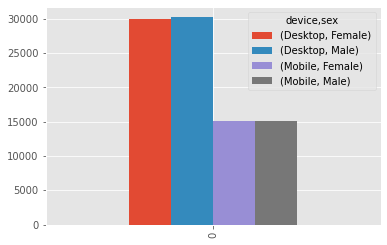

In [1398]:
###analysis of device used by men and women

data=pd.DataFrame(conc.groupby(['device','sex']).size())
plt.style.use('ggplot')
data.T.plot(kind='bar')

In [1399]:
"""
insight draw: Number of women and men accessing through desktop and mobile is almost same

"""

'\ninsight draw: Number of women and men accessing through desktop and mobile is almost same\n\n'

In [1400]:
##detailed and spacious graph for CTR with mobile and desktop

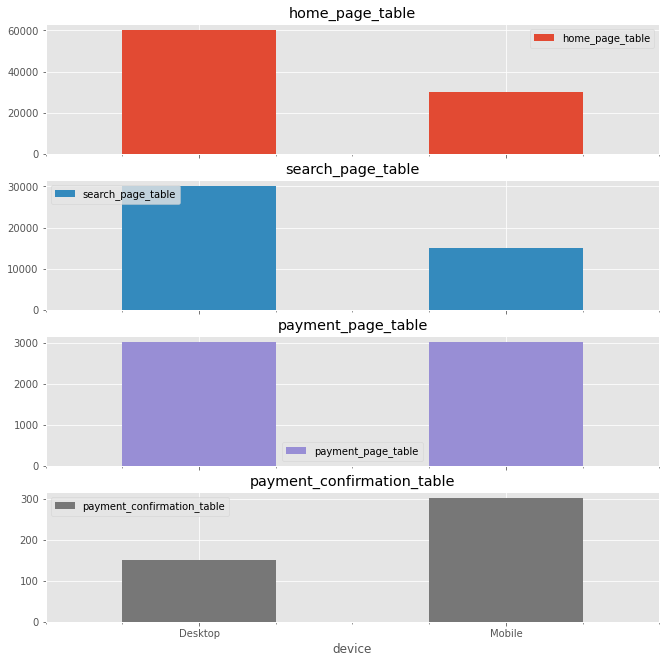

In [1401]:
axes = dev.plot.bar(rot=0, subplots=True,figsize=(11,11))
axes[1].legend(loc=2)  

In [1402]:
"""
insight drawn: same as that of funnel chart for devices

"""

'\ninsight drawn: same as that of funnel chart for devices\n\n'

In [1403]:
##drawing a line grapgh for better understanding and declining trend

<AxesSubplot:>

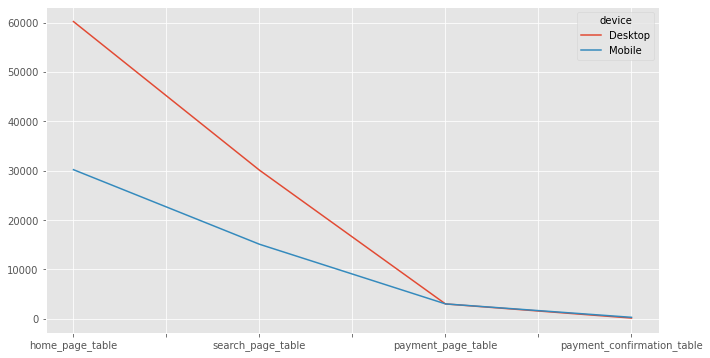

In [1411]:
##generalized graph for the above insight
dev.T.plot(legend=True,figsize=(11,6),)

In [1412]:
##creating a stacked bar graph for better visualization in comparison and understanding the decline in 
##reference to the previous page numbers

In [1413]:
month_on_month=pd.DataFrame(conc.groupby(['month']).sum())

In [1414]:
month_on_month.index=['Jan','Feb','March','April']

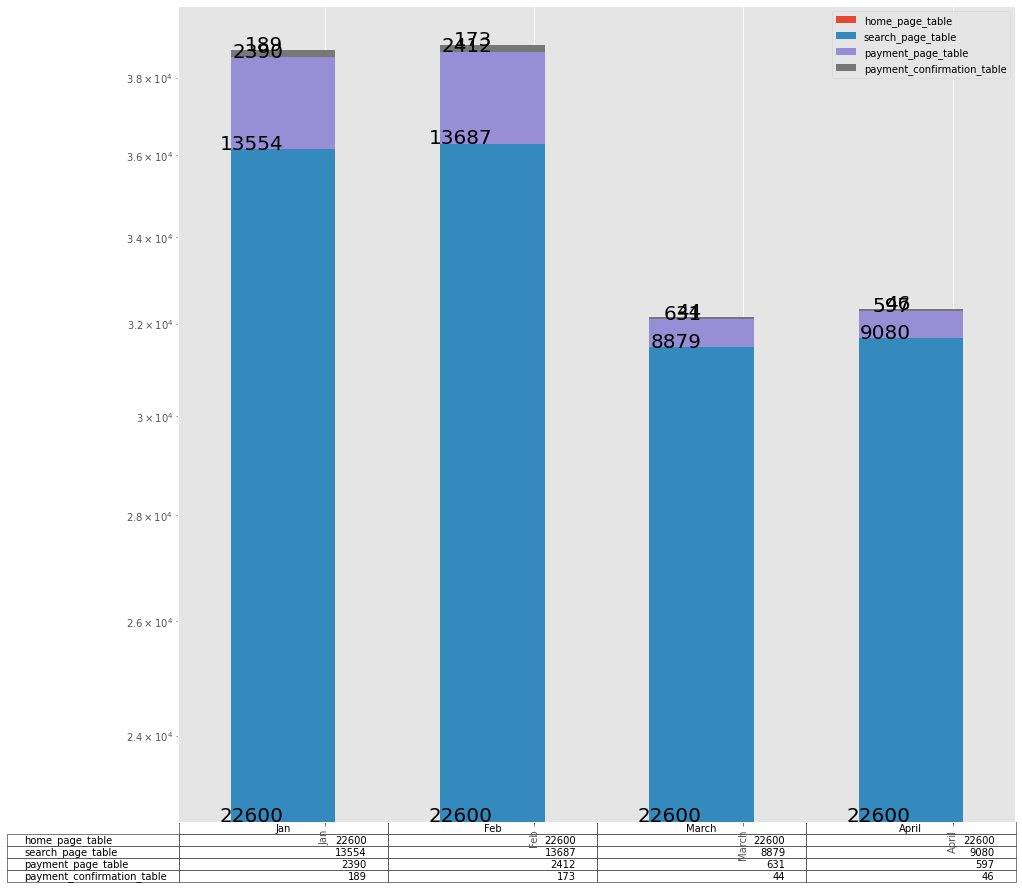

In [1417]:
ax = month_on_month.plot.bar(stacked=True,figsize=(15,15),logy=True,position=0.9,table=True)
##Taking the value of y axis in log function in order to deal with the large gap in the starting and ending values
y_offset=4

##displaying values
for bar in ax.patches:
  ax.text(
      # Put the text in the middle of each bar. get_x returns the start
      # so we add half the width to get to the middle.
      bar.get_x() + bar.get_width() / 2,
      # Vertically, add the height of the bar to the start of the bar,
      # along with the offset.
      bar.get_height() + bar.get_y() + y_offset,
      # This is actual value we'll show.
      round(bar.get_height()),ha='right',
      color='black',
      size=20)

### Sex based analysis

In [1418]:
sex=pd.DataFrame(conc.groupby('sex')[df_list].sum())
sex= sex.reindex(columns=['home_page_table','search_page_table','payment_page_table','payment_confirmation_table'])

###creating a funnel after grouping data and retrieving counts on the basis of sex


fig3 = px.funnel(sex.T)
fig3.show()


In [1419]:
"""
insight drawn: men and women have visited the platform both actively and equally and share the same decline in CTR

"""

'\ninsight drawn: men and women have visited the platform both actively and equally and share the same decline in CTR\n\n'